In [3]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import contingency_matrix
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import linalg as la
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import PolynomialFeatures, FunctionTransformer
from sklearn.preprocessing import StandardScaler
import re
import string

In [4]:
all_classes=fetch_20newsgroups(subset='all',shuffle=True, random_state=42)
#preprocess data:
for text,index in zip(all_classes,range(len(all_classes))): 
        temp = text
        temp = re.sub('[,.-:/()?{}*$#&]',' ',temp) 
        temp = "".join([ch for ch in temp if ch not in string.punctuation]) 
        temp = "".join(ch for ch in temp if ord(ch) < 128)  
        temp = temp.lower() 
        all_classes.data[index] = temp

vect=CountVectorizer(stop_words='english',min_df=3)
count=vect.fit_transform(all_classes.data)
trans=TfidfTransformer()
tfid=trans.fit_transform(count)
print (tfid.shape)

(18846, 52284)


In [5]:
train_labels= all_classes.target
print (train_labels.shape)
membersNum = [0]*20
for train_label in train_labels:
    membersNum[train_label] += 1
print(membersNum)
print(sum(membersNum))

(18846,)
[799, 973, 985, 982, 963, 988, 975, 990, 996, 994, 999, 991, 984, 990, 987, 997, 910, 940, 775, 628]
18846


r =  1 

Homo_score:  0.027886882674
Comp_score:  0.0309767970283
V_measure:  0.0293507408546
adjusted_rand:  0.00591133559644
adjusted_mutual:  0.0247108599739
contingency matrix:
[[ 37  81  92   6   5  73  23  21  58   0  70  20   1  86  54  52   0  84
   12  24]
 [119  24  54  64   3  79   5  91  99  11  30   2  50  68 113   9   2  42
    2 106]
 [ 93  39  87  46   0 107  16  43 105  19  38   4  18 128  92  28   0  60
    3  59]
 [ 91  32  90  44   0 104  10  64 111   3  63   2  19  94  81  34   0  55
    1  84]
 [ 90  38  72  38   3 105   7  59  95   1  46   1  29  97 104  24   0  65
    2  87]
 [113  17  52 104   7  76   5 108  87  10  23   1  71  69  97   5   0  31
    1 111]
 [112   9  69  82   1  92   3 100  91   0  29   0  50  60 119  10   0  44
    0 104]
 [ 74  33  85  54   1 113  12  72 106   1  54   9  21 107  95  28   0  55
    1  69]
 [100  40  72  37   0 131   6  65 145   0  30   2  14  92 112  10   0  50
    0  90]
 [ 91  39 114  40   1  93  20  48  86   2  53   8  25 

r =  20 

Homo_score:  0.288757222499
Comp_score:  0.383947567785
V_measure:  0.329617493023
adjusted_rand:  0.0935815967113
adjusted_mutual:  0.286428788586
contingency matrix:
[[  0   0 158 142  68   1   1   0  38  62 138   1   0   0   1   0   0  28
  161   0]
 [  0   0 427   1 134  16   2   0   0  96   0   1   0   0   0 280   2   7
    7   0]
 [  0   0 194   0  73   2  12  11   0  34   0   0   0   0   0 637   2  14
    6   0]
 [  4   0 293   0 197   9   4 196   0  31   0   0   0   0   0 214   3  30
    1   0]
 [  1   0 571   0 140  10   1  78   0  26   0   0   0   0   0  91  14  25
    6   0]
 [  0   0 318   0 191  29   1   0   0  95   0   0   0   0   4 342   2   4
    2   0]
 [ 13   0 588   0 197   4   6  55   0   6   0   3   0   0   0  53  33  13
    4   0]
 [  0   0 361   0 480  11   0   0   0  27   0   2   0   0   0   2  31  21
   55   0]
 [  1   0 257   0 575  16   1   0   0 101   0   0   0   0   0   0   7  10
   28   0]
 [386   0 402   0 160   4   1   0   0   3   0   3   0   0

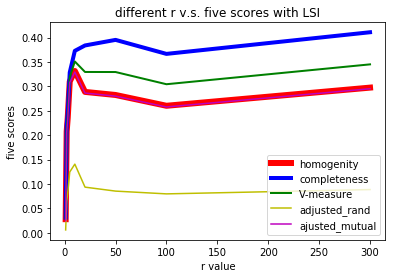

In [21]:
#find best r for LSI
Homo_score=[]
Comp_score=[]
V_measure=[]
adjusted_rand=[]
adjusted_mutual=[]
rs= [1,2,3,5,10,20,50,100,300]
index = 0
for r in rs:
    LSI=TruncatedSVD(n_components=r)
    LSI_data=LSI.fit_transform(tfid)
    km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
    km.fit(LSI_data)
    Homo_score.append(metrics.homogeneity_score(train_labels, km.labels_))
    Comp_score.append(metrics.completeness_score(train_labels, km.labels_))
    V_measure.append(metrics.v_measure_score(train_labels, km.labels_))
    adjusted_rand.append(metrics.adjusted_rand_score(train_labels, km.labels_))
    adjusted_mutual.append(metrics.adjusted_mutual_info_score(train_labels, km.labels_))
    contingency=contingency_matrix(train_labels, km.labels_)
    print('r = ', r, '\n');
    print('Homo_score: ', Homo_score[index])
    print('Comp_score: ', Comp_score[index])
    print('V_measure: ', V_measure[index])
    print('adjusted_rand: ', adjusted_rand[index])
    print('adjusted_mutual: ', adjusted_mutual[index])
    print ('contingency matrix:')
    print (contingency)
    index += 1
    print('\n')


    
plt.figure()
plt.plot(rs,Homo_score,'r',label='homogenity',lw=6)
plt.plot(rs,Comp_score,'b',label='completeness',lw=4)
plt.plot(rs,V_measure,'g',label='V-measure',lw=2)
plt.plot(rs,adjusted_rand,'y',label='adjusted_rand')
plt.plot(rs,adjusted_mutual,'m',label='ajusted_mutual')
plt.legend(loc='best')
plt.xlabel('r value')
plt.ylabel('five scores')
plt.title('different r v.s. five scores with LSI')
plt.show()

(18846, 10)
Homogeneity: 0.328
Completeness: 0.377
V_measure: 0.351
adjusted_rand: 0.131
adjusted_mutual: 0.326
contingency matrix with r=  10 

[[ 12   0  57   0  50  31 270   0 138   1  19   1 115   0  64  33   1   0
    0   7]
 [  9  17   0   0  78   4   1   0   0  17   0 415 167   0 160  41   0  63
    0   1]
 [  9  33   0   0  53   2   0   2   0   3   0 359  76   0  65   4   0 379
    0   0]
 [ 28 281   0   3 109   1   0 103   0   5   0 202  93   0 103  13   0  39
    2   0]
 [ 34 235   0   1  80   2   0  21   0   8   0 148 241   0 171  12   0  10
    0   0]
 [  4   1   0   0  96   0   0   0   0  25   0 501 102   0 122  35   0  96
    6   0]
 [ 44 135   0  12 117   3   1  16   0   5   0  51 331   0 236   5   0  17
    0   2]
 [ 44   3   0   1 311  84   0   0   0   8   0   6 237   0 290   2   0   0
    0   4]
 [ 14   2   0   4 422  27   5   0   3  16   0   2 167   0 276  43   0   0
    0  15]
 [  7   0   0 379 138  10   0   0   0   3   0   3 284   0 166   1   0   0
    0   3]
 [ 10

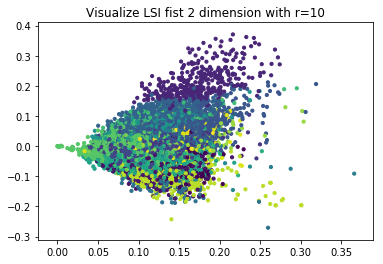

In [22]:
#best r = 10 on LSI:
#It is hard for human to recognize a 10-d graph, so I just visulize first two dimension(2-d graph) 
r=10
LSI=TruncatedSVD(n_components=r)
LSI_data=LSI.fit_transform(tfid)
print(LSI_data.shape)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(LSI_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V_measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("adjusted_rand: %0.3f" % metrics.adjusted_rand_score(train_labels, km.labels_))
print("adjusted_mutual: %0.3f" % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print ('contingency matrix with r= ', r,'\n')
print (contingency)
plt.figure()
plt.scatter(LSI_data[:,0],LSI_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize LSI fist 2 dimension with r=10')
plt.show()

Homogeneity: 0.313
Completeness: 0.345
V-measure: 0.328
Adjusted rand score: 0.121
Adjusted mutual info score: 0.310
[[ 41   0 125   1  64  57   1 246   1   0  24   0  36 119  73   0   0   0
    0  11]
 [ 71  46 148   0  42   0  17   1   0   0   2   0 218   2  35  15   0   1
  366   9]
 [ 53 358  67   0   5   0   3   0   0   1   2   2  97   0  17  31   0   0
  340   9]
 [111  36  81   0  16   0   6   0   0   5   1 100 152   0  26 254   0   3
  162  29]
 [ 83  11 213   0  11   0   8   0   0   3   5  21 209   0  55 210   0   1
   97  36]
 [ 90  86  88   0  40   0  25   0   0   1   0   0 222   1  10   1   0   6
  414   4]
 [102  13 285   0   5   0   5   1   0  15   2  16 273   2  55 117   3   0
   37  44]
 [267   1 167   0   3   0   8   0   0   6  53   0 151   4 278   4   0   0
    4  44]
 [386   0 144   0  51   0  16   7   0  20  14   0 137  29 173   5   0   0
    0  14]
 [116   0 190   0   1   0   4   0   0 402   8   0  90   5  43   0 127   0
    1   7]
 [ 34   0  60   0   1   0   3   0

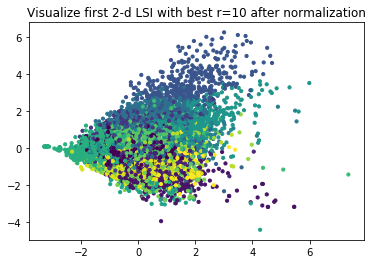

In [26]:
#normalized LSI:
best_r=10
scaler = StandardScaler()
data_NM = scaler.fit_transform(LSI_data)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(data_NM)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(data_NM[:,0],data_NM[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize first 2-d LSI with best r=10 after normalization')
plt.show()


r =  1 

Homo_score:  0.0277957777554
Comp_score:  0.0304479519871
V_measure:  0.0290614804471
adjusted_rand:  0.00591197589779
adjusted_mutual:  0.024611385145
contingency matrix:
[[ 71  47  68   3  28  19  78   6  80  46  51  18  19   0   0  83  35   0
   81  66]
 [ 29 111  59  51   6  91  42   3  44 106   8   3  84  48   2  24 117   2
   59  84]
 [ 40  91 115  34  15  56  59   0  72  92  26   4  40  15   0  39  81  15
   93  98]
 [ 63  85  97  41   7  75  48   0  81  86  36   1  54  10   0  32  86   2
   77 101]
 [ 48  98  90  38   3  74  53   3  72  95  28   2  49  14   0  36  92   1
   76  91]
 [ 17 100  64 102   5 115  34   7  42  78   6   1  91  54   0  15 116   2
   58  81]
 [ 26 118  67  66   2  84  35   1  64 102  10   0 103  36   0  10 112   0
   58  81]
 [ 55  80 101  42  14  74  44   1  67 101  31   2  65  11   0  32  73   0
   95 102]
 [ 31 111 114  27   6  77  39   0  67 114   7   0  56   4   0  41 104   0
   78 120]
 [ 46  93  88  34  22  66  76   1  88  96  20   3  41 

r =  20 

Homo_score:  0.273972970749
Comp_score:  0.388673656685
V_measure:  0.321396267529
adjusted_rand:  0.0709440397732
adjusted_mutual:  0.271594871541
contingency matrix:
[[217   0   0  38   1   0   0  18   1   1   2   0  67  71  50   0   0 130
    0 203]
 [406   0   0   0   0   0   2   7  16   2   1   0  82 121   0   0 335   0
    0   1]
 [177   0   0   0   0   0   2  15   2  12   0   0  35  68   0   0 664   0
   10   0]
 [310   4   0   0   0   0   3  30  10   4   0   0  29 181   0   0 214   0
  197   0]
 [592   1   0   0   0   0  14  23  10   1   0   0  24 119   0   0  97   0
   82   0]
 [302   0   0   0   5   0   2   4  27   2   0   0  87 156   0   0 403   0
    0   0]
 [618  14   0   0   0   0  33  14   4   7   5   0   5 159   0   0  56   0
   59   1]
 [497   1   0   0   0   0  32  21  11   1   3   0  27 394   0   0   3   0
    0   0]
 [334   2   0   0   0   0   6   9  17   1   0   0 108 509   0   0   0   0
    0  10]
 [440 384   0   0   0   0   7   2   4   1   4   0   2 149

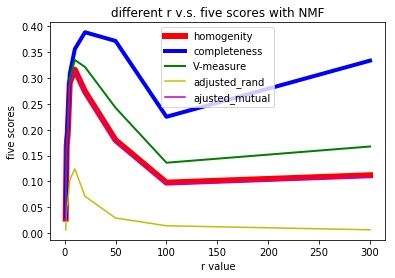

In [23]:
#find best r for NMF
Homo_score=[]
Comp_score=[]
V_measure=[]
adjusted_rand=[]
adjusted_mutual=[]
rs= [1,2,3,5,10,20,50,100,300]
index = 0
for r in rs:
    NMF_model=NMF(n_components=r,random_state=0)
    NMF_data=NMF_model.fit_transform(tfid)
    km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
    km.fit(NMF_data)
    Homo_score.append(metrics.homogeneity_score(train_labels, km.labels_))
    Comp_score.append(metrics.completeness_score(train_labels, km.labels_))
    V_measure.append(metrics.v_measure_score(train_labels, km.labels_))
    adjusted_rand.append(metrics.adjusted_rand_score(train_labels, km.labels_))
    adjusted_mutual.append(metrics.adjusted_mutual_info_score(train_labels, km.labels_))
    contingency=contingency_matrix(train_labels, km.labels_)
    print('r = ', r, '\n');
    print('Homo_score: ', Homo_score[index])
    print('Comp_score: ', Comp_score[index])
    print('V_measure: ', V_measure[index])
    print('adjusted_rand: ', adjusted_rand[index])
    print('adjusted_mutual: ', adjusted_mutual[index])
    print ('contingency matrix:')
    print (contingency)
    index += 1
    print('\n')



plt.figure()
plt.plot(rs,Homo_score,'r',label='homogenity',lw=6)
plt.plot(rs,Comp_score,'b',label='completeness',lw=4)
plt.plot(rs,V_measure,'g',label='V-measure',lw=2)
plt.plot(rs,adjusted_rand,'y',label='adjusted_rand')
plt.plot(rs,adjusted_mutual,'m',label='ajusted_mutual')
plt.legend(loc='best')
plt.xlabel('r value')
plt.ylabel('five scores')
plt.title('different r v.s. five scores with NMF')
plt.show()


Homogeneity: 0.316
Completeness: 0.356
V_measure: 0.335
adjusted_rand: 0.124
adjusted_mutual: 0.314
contingency matrix with r=  10 

[[120  15  84   1 229   0   1   5   0   0   0  74   8   2 109   1 101  49
    0   0]
 [  4  19 171   8   1   3   1 416   0   0   1  18   0  13 124   0  98   0
    0  96]
 [  2  12  81   2   0  25   1 383   0   0   0  11   0  12  51   0  68   0
    2 335]
 [  1  16 136   2   0 201   6 220   0   0   4  25   0  16  96   0 135   0
   86  38]
 [  1  17 250   4   0 128   7 176   0   0   2  15   0   9 237   0  97   0
   15   5]
 [  1  12 120  15   0   1   1 468   0   0  12  20   0  18  70   0 124   0
    0 126]
 [  4  18 253   1   1  90  19  66   3   0   1  24   0  11 337   0 127   0
   12   8]
 [ 85   5 216   4   0   2   7   8   0   0   0  73   0  16 242   0 332   0
    0   0]
 [ 37  10 202   2   8   2  27  17   0   0   0 164   0  21 135   0 371   0
    0   0]
 [  3  25  87   1   0   0 459   2 127   0   0  30   0   3 152   0 105   0
    0   0]
 [  1   9  35   0

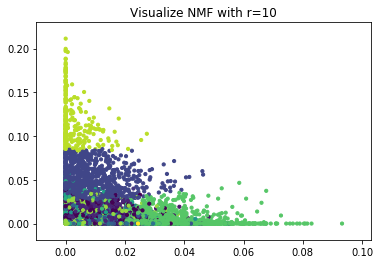

In [27]:
#best r = 10 on NMF:
#It is hard for human to recognize a 10-d graph, so I just visulize first two dimension(2-d graph)
r=10
NMF_model=NMF(n_components=r)
NMF_data=NMF_model.fit_transform(tfid)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(NMF_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V_measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("adjusted_rand: %0.3f" % metrics.adjusted_rand_score(train_labels, km.labels_))
print("adjusted_mutual: %0.3f" % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print ('contingency matrix with r= ', r,'\n')
print (contingency)


plt.figure()
plt.scatter(NMF_data[:,0],NMF_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize NMF with r=10')
plt.show()

Homogeneity: 0.307
Completeness: 0.339
V-measure: 0.322
Adjusted rand score: 0.121
Adjusted mutual info score: 0.305
[[202  67   0   1   0  74  64 101   0   0   9  46  74   0   0   4   1  67
   89   0]
 [  1 137   0  16   0  44  14   3   1   0   0   0  88  95   3 404   0   3
  164   0]
 [  0  61   0   4   2  22   6   0   0   0   0   0  63 335  21 375   0   2
   93   1]
 [  0 109   0   8  85  55  18   0   3   0   0   0 130  38 194 224   0   0
  111   7]
 [  0 154   0  10  15 102  10   2   1   0   0   0 100   5 125 170   0   1
  265   3]
 [  0 108   0  27   0  24  13   1  12   0   0   0 112 125   1 464   0   0
  101   0]
 [  1 144   0   7  12 150  22   3   0   3   0   0 124   8  86  61   0   2
  336  16]
 [  0 158   0   8   0  99  64  43   0   0   0   0 267   0   2   9   0  88
  246   6]
 [  3 154   0  16   0  66 148  10   0   0   0   0 332   0   2  16   0  63
  168  18]
 [  0  63   0   3   0  73  31   4   0 116   0   0 105   0   0   2   0   4
  165 428]
 [  1  26   0   3   0  42   7   1

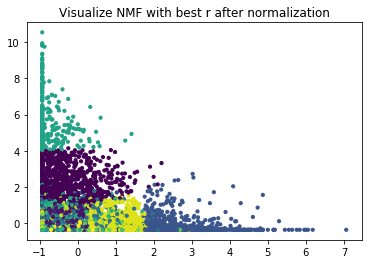

In [29]:
#normalized NMF
scaler = StandardScaler()
NM_data= scaler.fit_transform(NMF_data)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(NM_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(NM_data[:,0],NM_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Visualize NMF with best r after normalization')
plt.show()


Homogeneity: 0.320
Completeness: 0.358
V-measure: 0.338
Adjusted rand score: 0.127
Adjusted mutual info score: 0.317
[[  0   3   0   0 106  55  94   9   0   0   1  78 115   1   0  76   1 239
    6  15]
 [  1  14   0 103 125   0  98   0   0   0   3 161   4   8   3  18   0   1
  415  19]
 [  0  12   0 344  52   0  69   0   2   0   1  75   2   2  25  11   0   0
  378  12]
 [  5  16   0  38  94   0 136   0  95   0   6 129   1   2 198  25   0   0
  222  15]
 [  2   8   0   5 237   0  96   0  17   0   7 234   1   5 135  15   0   0
  184  17]
 [ 13  17   0 134  72   0 124   0   0   0   1 109   1  16   1  20   0   0
  467  13]
 [  1  11   3   8 343   0 127   0  13   0  19 243   4   1  92  24   0   1
   67  18]
 [  0  17   0   0 244   0 330   0   0   0   8 210  86   4   2  75   0   0
    8   6]
 [  0  20   0   0 135   0 364   0   0   0  28 198  40   5   3 168   0   8
   16  11]
 [  0   2 137   0 146   0 103   0   0   0 458  84   3   2   0  31   0   0
    2  26]
 [  0   3 426   0  41   0  22   0

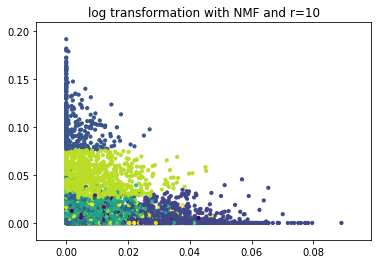

In [30]:
#logarithm transformed NMF:
log_model = FunctionTransformer(np.log1p)
log_data=log_model.fit_transform(NMF_data)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(log_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(log_data[:,0],log_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('log transformation with NMF and r=10')
plt.show()

Homogeneity: 0.309
Completeness: 0.343
V-measure: 0.325
Adjusted rand score: 0.120
Adjusted mutual info score: 0.307
[[114   1  49  97   4   0   1   0   0   1   0   0   0   3  69  75  72   9
  208  96]
 [  3   0   0 157 392   0   8   3  98   0   0   1   0  10 153  45  18   0
    1  84]
 [  2   1   0  87 378   0   2  23 335   0   0   0   2   8  62  22  11   0
    0  52]
 [  0   7   0 100 223   0   2 195  38   0   0   3  96  14 107  54  23   0
    0 120]
 [  2   3   0 258 169   0   5 133   5   0   0   1  17   7 156 101  14   0
    0  92]
 [  0   0   0  97 454   0  16   1 128   0   0  12   0  16 121  24  19   0
    0 100]
 [  3  16   0 330  62   0   1  93   8   0   3   0  13  10 143 149  22   0
    1 121]
 [ 72   6   0 251   9   0   4   2   0   0   0   0   0  16 144  99  67   0
    0 320]
 [ 27  20   0 165  17   0   2   3   0   0   0   0   0  20 146  65 158   0
    5 368]
 [  3 423   0 159   2   0   1   0   0   0 132   0   0   3  59  73  31   0
    0 108]
 [  1 444   0  45   0   0   0   0

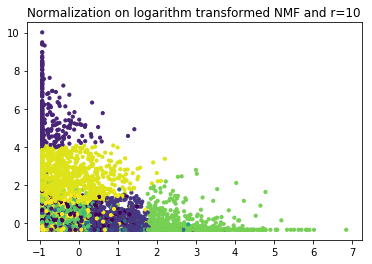

In [31]:
##NMF -> logarithm transformation -> normalization
log_NM_data= scaler.fit_transform(log_data)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(log_NM_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(log_NM_data[:,0],log_NM_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('Normalization on logarithm transformed NMF and r=10')
plt.show()

Homogeneity: 0.307
Completeness: 0.322
V-measure: 0.315
Adjusted rand score: 0.130
Adjusted mutual info score: 0.305
[[  3  83  65   0   0  37   0  73 108  31  12   9   3 181  76   1 113   0
    4   0]
 [122  55  12   1   0  57   8   0  10   0 245 286 141   0   4   0  20   0
   12   0]
 [149  19   2   1   7  48   2   0   1   0 205 328 205   0   2   0  11   0
    5   0]
 [166  52  25   5 187  83  11   0   1   1 138 194  78   0   3   3  28   1
    6   0]
 [ 46 167  17   4 121  70   9   0   9   1 152 282  36   0   5   2  36   0
    6   0]
 [218  26   4   0   0  65  20   0   2   0 238 213 161   1   0   1  26   5
    8   0]
 [ 28 337  17  29  77 125   2   0  12   0  79 185  11   3  10  10  39   0
   11   0]
 [ 10 187 118   9   2 166   4   0  61   3  42  19   0   0 179   0 171   0
   19   0]
 [ 37  97 191  15   3 228  16   0  22   1  35  21   0   0 104   4 212   0
   10   0]
 [  4 118  66 462   0  65   2   0  15   0   8   6   0   0  25 144  75   0
    4   0]
 [  1  29  26 497   0  16   1   0

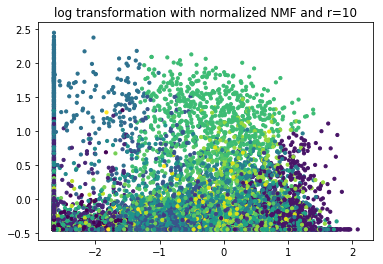

In [32]:
##NMF -> normalization -> logarithm transformation
NM_log_data=log_model.fit_transform(NM_data)
km=KMeans(n_clusters=20,n_init=10,init='k-means++',max_iter=300)
km.fit(NM_log_data)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(train_labels, km.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(train_labels, km.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(train_labels, km.labels_))
print("Adjusted rand score: %.3f"
      % metrics.adjusted_rand_score(train_labels, km.labels_))
print("Adjusted mutual info score: %0.3f"
      % metrics.adjusted_mutual_info_score(train_labels, km.labels_))
contingency=contingency_matrix(train_labels, km.labels_)
print (contingency)

plt.figure()
plt.scatter(NM_log_data[:,0],NM_log_data[:,1],c=km.labels_,s=10,cmap='viridis')
plt.title('log transformation with normalized NMF and r=10')
plt.show()
